<a href="https://colab.research.google.com/github/N125-ui/GOOGLE-COLAB/blob/main/ISI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Accidents_data_new (2).xlsx to Accidents_data_new (2).xlsx


In [ ]:
# Load the dataset
data = pd.read_excel('Accidents_data_new (2).xlsx')

# Display the first few rows of the dataset
print(data.head())

data.info()

# Description and summary statistics of the dataset

data.describe()

          State Name  Year    Month Day of Week Time _of _Day  \
0  Jammu and Kashmir  2018  January      Monday       16.0432   
1            Gujarat  2018  January      Friday        8.9108   
2        Uttarakhand  2018  January   Wednesday        5.5727   
3           Nagaland  2018  January     Tuesday       13.1452   
4          Meghalaya  2018  January    Thursday        0.6961   

  Accident_Severity  Number of Vehicles Involved Vehicle Type Involved  \
0             Minor                            3                 Truck   
1             Minor                            3           Two-Wheeler   
2             Minor                            5            Pedestrian   
3             Fatal                            4                 Truck   
4           Serious                            1            Pedestrian   

   Number of Casualties  Number of Fatalities  ...         Road Type  \
0                    10                     2  ...      Village Road   
1                   

,Year,Number of Vehicles Involved,Number of Casualties,Number of Fatalities,Speed Limit (km/h),Driver Age
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000
mean,2020.466333,2.996000,5.066000,2.455333,74.940667,44.17700
std,1.721972,1.428285,3.214097,1.717650,26.765088,15.40286
min,2018.000000,1.000000,0.000000,0.000000,30.000000,18.00000
25%,2019.000000,2.000000,2.000000,1.000000,51.000000,31.00000
50%,2020.000000,3.000000,5.000000,2.000000,75.000000,45.00000
75%,2022.000000,4.000000,8.000000,4.000000,99.000000,57.00000
max,2023.000000,5.000000,10.000000,5.000000,120.000000,70.00000


In [ ]:
print(data.columns)

Index(['State Name', 'Year', 'Month', 'Day of Week', 'Time _of _Day',
       'Accident_Severity', 'Number of Vehicles Involved',
       'Vehicle Type Involved', 'Number of Casualties', 'Number of Fatalities',
       'Weather Conditions', 'Road Type', 'Road Condition',
       'Lighting Conditions', 'Traffic Control Presence', 'Speed Limit (km/h)',
       'Driver Age', 'Driver Gender', 'Driver License Status',
       'Alcohol Involvement', 'Accident Location Details'],
      dtype='object')


In [ ]:
# Count accidents per (State, Year, )
ly_accidents = data.groupby(['State Name', 'Year', 'Month']).size().reset_index(name='Total_Accidents')

# Extract first representative record from each group
representative_columns = ['Weather Conditions', 'Road Type', 'Road Condition', 'Lighting Conditions', 'Driver Age', 'Number of Vehicles Involved',
                          'Traffic Control Presence', 'Driver Gender', 'Vehicle Type Involved', 'Accident_Severity', 'Number of Casualties',
                          'Driver License Status', 'Alcohol Involvement', 'Accident Location Details', 'Speed Limit (km/h)', 'Number of Fatalities']

# Get first row per group
first_values = data.groupby(['State Name', 'Year', 'Month'])[representative_columns].first().reset_index()

# Merge with accident counts
monthly_data = pd.merge(ly_accidents, first_values, on=['State Name', 'Year', 'Month'])

# Save to CSV
monthly_data.to_csv("Monthly_Accident_Details.csv", index=True)

print(monthly_data.head())

       State Name  Year     Month  Total_Accidents Weather Conditions  \
0  Andhra Pradesh  2018     April                1              Rainy   
1  Andhra Pradesh  2018  December                3             Stormy   
2  Andhra Pradesh  2018  February                2             Stormy   
3  Andhra Pradesh  2018   January                1              Foggy   
4  Andhra Pradesh  2018      June                3              Foggy   

       Road Type      Road Condition Lighting Conditions  Driver Age  \
0   Village Road                 Wet                Dusk          26   
1  State Highway  Under Construction            Daylight          44   
2     Urban Road                 Dry                Dusk          59   
3  State Highway                 Dry            Daylight          65   
4   Village Road  Under Construction                Dark          69   

   Number of Vehicles Involved Traffic Control Presence Driver Gender  \
0                            5         Police Checkpost

In [ ]:
data_monthly = pd.read_csv('Monthly_Accident_Details.csv')

In [ ]:
from google.colab import files
files.download('Monthly_Accident_Details.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Description and summary statistics of the dataset

data.describe()

,Year,Number of Vehicles Involved,Number of Casualties,Number of Fatalities,Speed Limit (km/h),Driver Age,Severity_Encoded,Severity_enc
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000
mean,2020.466333,2.996000,5.066000,2.455333,74.940667,44.17700,0.983667,0.998667
std,1.721972,1.428285,3.214097,1.717650,26.765088,15.40286,0.820340,0.809660
min,2018.000000,1.000000,0.000000,0.000000,30.000000,18.00000,0.000000,0.000000
25%,2019.000000,2.000000,2.000000,1.000000,51.000000,31.00000,0.000000,0.000000
50%,2020.000000,3.000000,5.000000,2.000000,75.000000,45.00000,1.000000,1.000000
75%,2022.000000,4.000000,8.000000,4.000000,99.000000,57.00000,2.000000,2.000000
max,2023.000000,5.000000,10.000000,5.000000,120.000000,70.00000,2.000000,2.000000


In [ ]:
column_list = data.columns.tolist()
print(column_list)

['State Name', 'Year', 'Month', 'timestamp', 'Day of Week', 'Time _of _Day', 'Accident_Severity', 'Number of Vehicles Involved', 'Vehicle Type Involved', 'Number of Casualties', 'Number of Fatalities', 'Weather Conditions', 'Road Type', 'Road Condition', 'Lighting Conditions', 'Traffic Control Presence', 'Speed Limit (km/h)', 'Driver Age', 'Driver Gender', 'Driver License Status', 'Alcohol Involvement', 'Accident Location Details', 'Month_num', 'Weekday_num', 'day', 'Time_in_seconds', 'Total_Accidents', 'Total_Accidents.1']


In [ ]:
data.isnull().sum().sort_values(ascending=False)

,0
Driver License Status,975
Traffic Control Presence,716
State Name,0
Day of Week,0
Time _of _Day,0
Year,0
Month,0
Number of Vehicles Involved,0
Accident_Severity,0
Number of Fatalities,0


In [ ]:
data['Driver License Status'] = data['Driver License Status'].fillna('Unknown')

data['Traffic Control Presence'] = data['Traffic Control Presence'].fillna('Unknown')

data

,State Name,Year,Month,Day of Week,Time _of _Day,Accident_Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,Number of Fatalities,...,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details,Severity_Encoded,Severity_enc
0,Jammu and Kashmir,2018,January,Monday,16.0432,Minor,3,Truck,10,2,...,Dawn,Police Checkpost,90,56,Male,Expired,Yes,Straight Road,0,1
1,Gujarat,2018,January,Friday,8.9108,Minor,3,Two-Wheeler,9,5,...,Daylight,Unknown,62,23,Female,Unknown,Yes,Intersection,0,1
2,Uttarakhand,2018,January,Wednesday,5.5727,Minor,5,Pedestrian,5,0,...,Dusk,Signs,70,70,Female,Expired,Yes,Intersection,0,1
3,Nagaland,2018,January,Tuesday,13.1452,Fatal,4,Truck,0,2,...,Daylight,Unknown,101,50,Male,Expired,Yes,Curve,2,0
4,Meghalaya,2018,January,Thursday,0.6961,Serious,1,Pedestrian,7,0,...,Dusk,Signs,108,67,Male,Unknown,No,Curve,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Karnataka,2023,December,Saturday,14.2095,Minor,4,Pedestrian,2,1,...,Daylight,Police Checkpost,69,70,Female,Expired,No,Bridge,0,1
2996,Tripura,2023,December,Monday,17.4168,Serious,1,Bus,2,1,...,Dark,Unknown,80,39,Male,Unknown,Yes,Bridge,1,2
2997,Maharashtra,2023,December,Sunday,6.909,Fatal,2,Cycle,6,2,...,Daylight,Police Checkpost,46,49,Female,Expired,Yes,Intersection,2,0
2998,Tamil Nadu,2023,December,Sunday,23.7569,Serious,2,Car,3,0,...,Dawn,Signals,82,67,Female,Valid,No,Straight Road,1,2


In [ ]:
data.duplicated().sum()

np.int64(0)

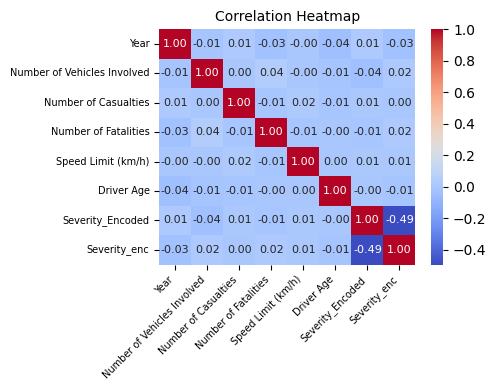

In [ ]:
# Correlation heatmap for numeric features

numeric_df = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    annot_kws={"size": 8}
)
plt.xticks(rotation=45,ha="right",fontsize=7)
plt.yticks(fontsize=7)
plt.title('Correlation Heatmap',fontsize=10)
plt.tight_layout()
plt.show()

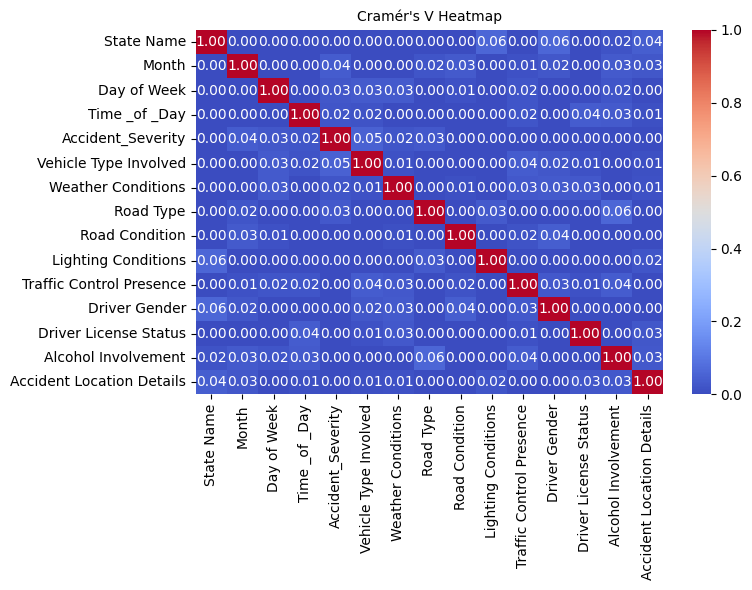

In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            cramer_matrix.loc[col1, col2] = 1.0
        else:
            cramer_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

plt.figure(figsize=(8, 6))
sns.heatmap(cramer_matrix.astype(float), annot=True, cmap='coolwarm', center=0.5, fmt=".2f")
plt.title("Cramér's V Heatmap", fontsize=10)
plt.tight_layout()
plt.show()

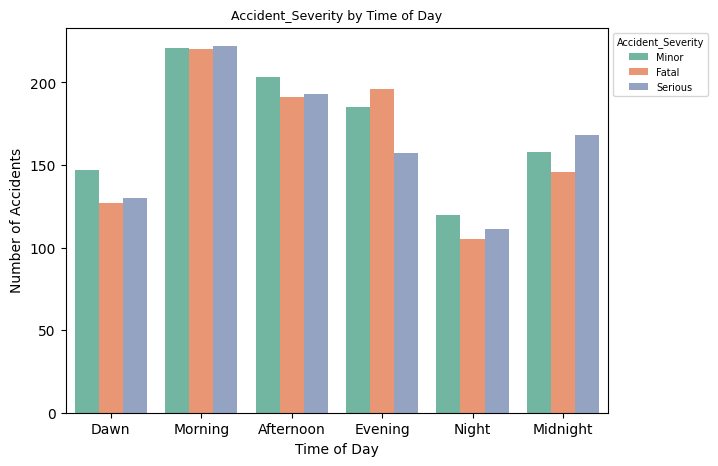

In [ ]:
def classify_time(time_value):
    try:
        time_str = str(time_value)
        if ':' in time_str:
            hours, minutes = map(int, time_str.split(':'))
            hour = hours + minutes / 60
        else:
            hour = float(time_str)

        if 4 <= hour < 7:
            return 'Dawn'
        elif 7 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 17:
            return 'Afternoon'
        elif 17 <= hour < 21:
            return 'Evening'
        elif 21 <= hour < 24:
            return 'Night'
        else:
            return 'Midnight'
    except ValueError:
        return 'Unknown'

# Apply classification
data['TimePeriod'] = data['Time _of _Day'].apply(classify_time)

# Plot count of Accident_Severity by time period
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='TimePeriod', hue='Accident_Severity', order=['Dawn','Morning', 'Afternoon', 'Evening', 'Night','Midnight'], palette='Set2')
plt.title('Accident_Severity by Time of Day', fontsize=9)
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident_Severity', fontsize=7, title_fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
# Group by State, Year, Month and count accidents (1 per row)
monthly_accidents = data.groupby(['State Name', 'Year', 'Month']).size().reset_index(name='Total_Accidents')

# Display the first few rows
print(monthly_accidents)

          State Name  Year      Month  Total_Accidents
0     Andhra Pradesh  2018      April                1
1     Andhra Pradesh  2018   December                3
2     Andhra Pradesh  2018   February                2
3     Andhra Pradesh  2018    January                1
4     Andhra Pradesh  2018       June                3
...              ...   ...        ...              ...
1679     West Bengal  2023      March                1
1680     West Bengal  2023        May                3
1681     West Bengal  2023   November                2
1682     West Bengal  2023    October                1
1683     West Bengal  2023  September                1

[1684 rows x 4 columns]


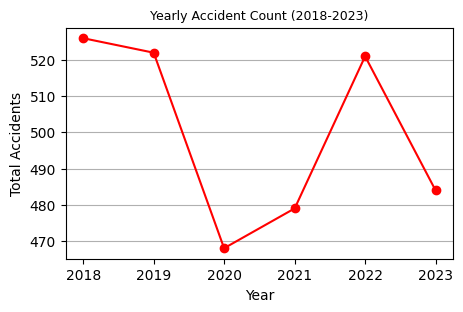

In [ ]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
yearly_accident = data.groupby('Year')['Accident_Severity'].count()

plt.figure(figsize=(5, 3))
plt.plot(yearly_accident.index, yearly_accident.values, marker="o", linestyle="-", color='red')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.title('Yearly Accident Count (2018-2023)', fontsize=9)
plt.grid(axis='y')
plt.show()

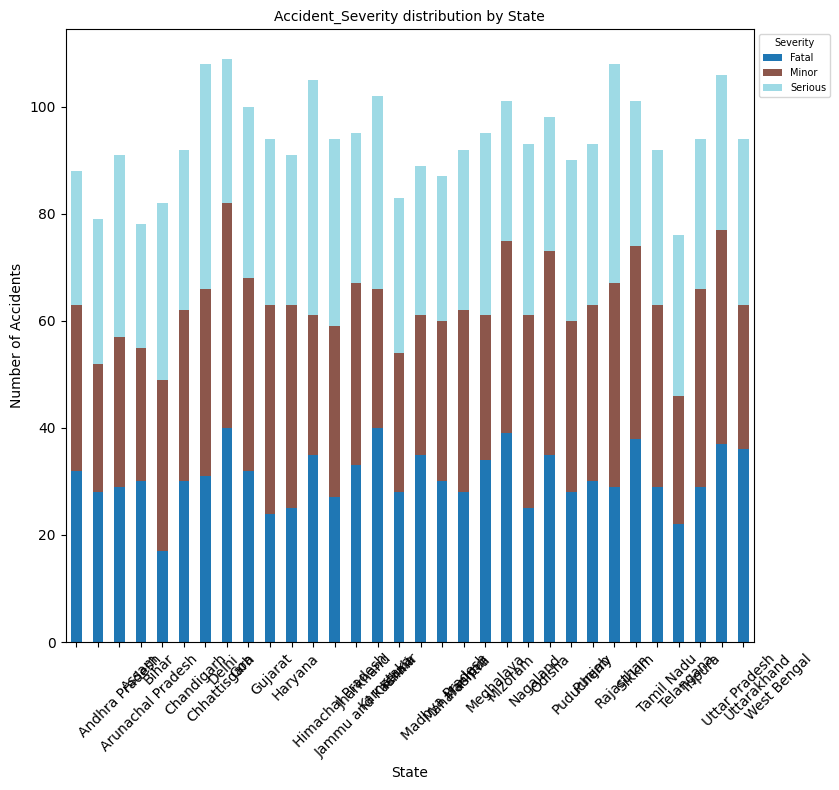

In [ ]:
# Create cross-tab of Accident_Severity vs state
cross_tab = pd.crosstab(data['State Name'], data['Accident_Severity'])

# Plot stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10,8), colormap='tab20')
plt.title('Accident_Severity distribution by State',fontsize=10)
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='left')
plt.legend(title='Severity',fontsize=7, title_fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

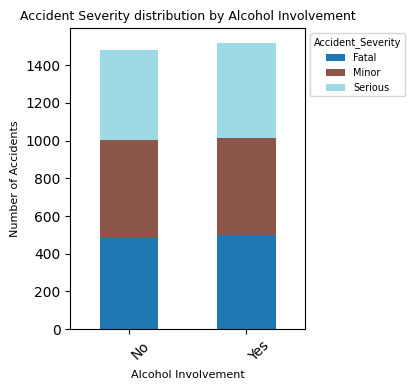

In [ ]:
# Create cross-tab of Accident_Severity vs Alcohol Involvement
cross_tab = pd.crosstab(data['Alcohol Involvement'], data['Accident_Severity'])

# Plot stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(5, 4), colormap='tab20')
plt.title('Accident Severity distribution by Alcohol Involvement',fontsize=9)
plt.xlabel('Alcohol Involvement', fontsize=8)
plt.ylabel('Number of Accidents', fontsize=8)
plt.xticks(rotation=45, ha='left')
plt.legend(title='Accident_Severity',fontsize=7, title_fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

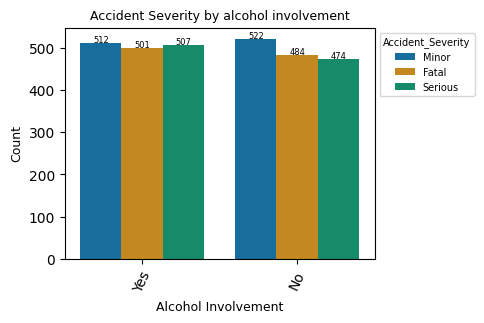

In [ ]:
plt.figure(figsize=(4, 3))
ax = sns.countplot(data=data, x="Alcohol Involvement", hue="Accident_Severity", palette="colorblind")
plt.title("Accident Severity by alcohol involvement", fontsize=9)
plt.xlabel("Alcohol Involvement", fontsize=9)
plt.ylabel("Count", fontsize=9)
plt.xticks(rotation=65)
plt.legend(title='Accident_Severity',fontsize=7, title_fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 1,
            int(height),
            ha="center", fontsize=6)

plt.show()

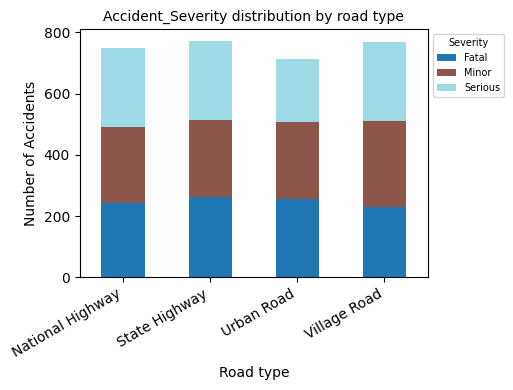

In [ ]:
# Create cross-tab of Accident_Severity vs state
cross_tab = pd.crosstab(data['Road Type'], data['Accident_Severity'])

# Plot stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(6,4), colormap='tab20')
plt.title('Accident_Severity distribution by road type',fontsize=10)
plt.xlabel('Road type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Severity',fontsize=7, title_fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

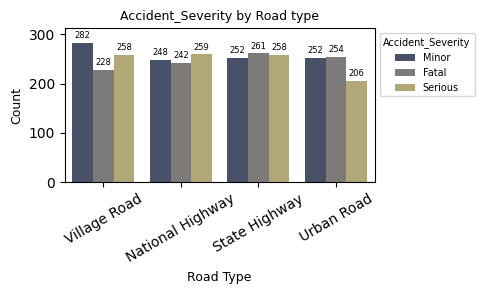

In [ ]:
plt.figure(figsize=(4, 2))
ax = sns.countplot(data=data, x="Road Type", hue="Accident_Severity", palette="cividis")
plt.title("Accident_Severity by Road type", fontsize=9)
plt.xlabel("Road Type", fontsize=9)
plt.ylabel("Count", fontsize=9)
plt.xticks(rotation=30)
plt.legend(title='Accident_Severity',fontsize=7, title_fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))

max_height = max([p.get_height() for p in ax.patches])
plt.ylim(0, max_height + 30)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 10,
            int(height),
            ha="center", fontsize=6)

plt.show()

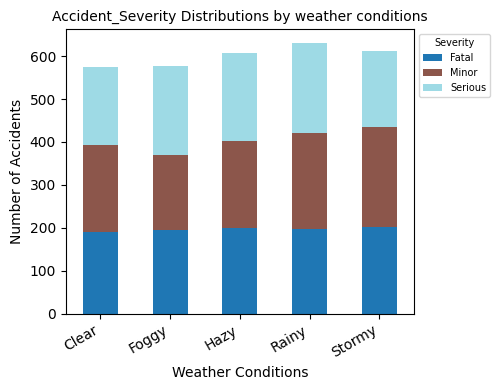

In [ ]:
# Create cross-tab of Accident_Severity vs state
cross_tab = pd.crosstab(data['Weather Conditions'], data['Accident_Severity'])

# Plot stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(6,4), colormap='tab20')
plt.title('Accident_Severity Distributions by weather conditions',fontsize=10)
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Severity',fontsize=7, title_fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

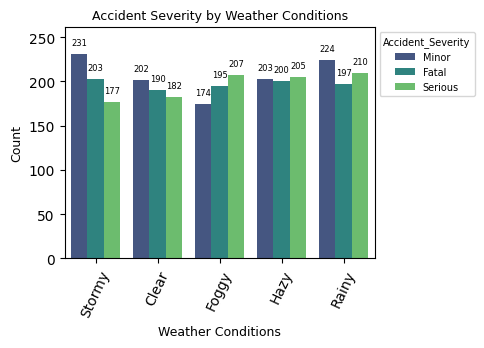

In [ ]:
plt.figure(figsize=(4, 3))
ax = sns.countplot(data=data, x="Weather Conditions", hue="Accident_Severity", palette="viridis")
plt.title("Accident Severity by Weather Conditions", fontsize=9)
plt.xlabel("Weather Conditions", fontsize=9)
plt.ylabel("Count", fontsize=9)
plt.xticks(rotation=65)
plt.legend(title='Accident_Severity',fontsize=7, title_fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))

max_height = max([p.get_height() for p in ax.patches])
plt.ylim(0, max_height + 30)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 10,
            int(height),
            ha="center", fontsize=6)

plt.show()

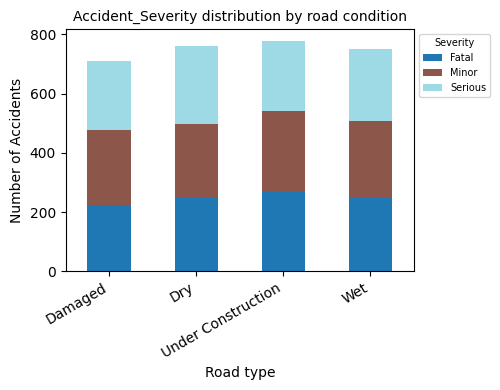

In [ ]:
# Create cross-tab of Accident_Severity vs state
cross_tab = pd.crosstab(data['Road Condition'], data['Accident_Severity'])

# Plot stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(6,4), colormap='tab20')
plt.title('Accident_Severity distribution by road condition',fontsize=10)
plt.xlabel('Road type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Severity',fontsize=7, title_fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

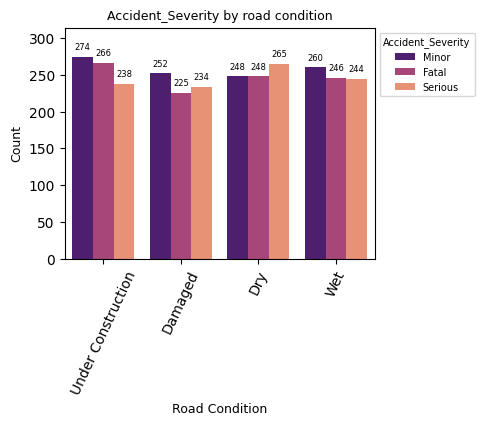

In [ ]:
plt.figure(figsize=(4, 3))
ax = sns.countplot(data=data, x="Road Condition", hue="Accident_Severity", palette="magma")
plt.title("Accident_Severity by road condition", fontsize=9)
plt.xlabel("Road Condition", fontsize=9)
plt.ylabel("Count", fontsize=9)
plt.xticks(rotation=65)
plt.legend(title='Accident_Severity',fontsize=7, title_fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))

max_height = max([p.get_height() for p in ax.patches])
plt.ylim(0, max_height + 40)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 10,
            int(height),
            ha="center", fontsize=6)

plt.show()

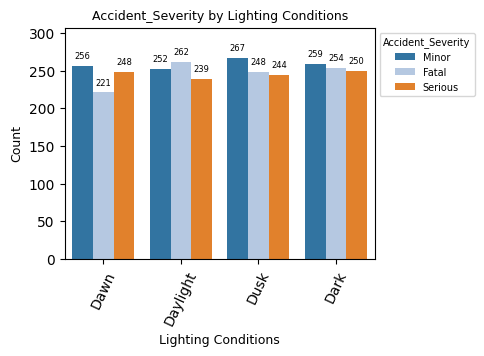

In [ ]:
plt.figure(figsize=(4, 3))
ax = sns.countplot(data=data, x="Lighting Conditions", hue="Accident_Severity", palette="tab20")
plt.title("Accident_Severity by Lighting Conditions", fontsize=9)
plt.xlabel("Lighting Conditions", fontsize=9)
plt.ylabel("Count", fontsize=9)
plt.xticks(rotation=65)
plt.legend(title='Accident_Severity',fontsize=7, title_fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))

max_height = max([p.get_height() for p in ax.patches])
plt.ylim(0, max_height + 40)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 10,
            int(height),
            ha="center", fontsize=6)

plt.show()

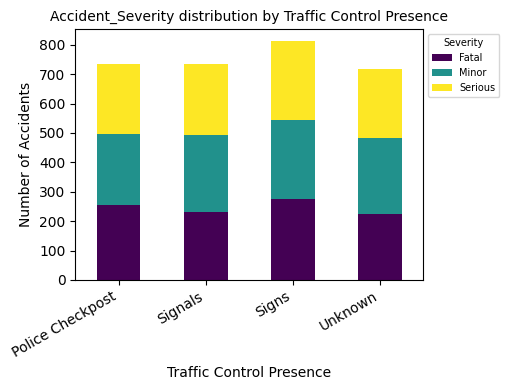

In [ ]:
# Create cross-tab of Accident_Severity vs state
cross_tab = pd.crosstab(data['Traffic Control Presence'], data['Accident_Severity'])

# Plot stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(6,4), colormap='viridis')
plt.title('Accident_Severity distribution by Traffic Control Presence',fontsize=10)
plt.xlabel('Traffic Control Presence')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Severity',fontsize=7, title_fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

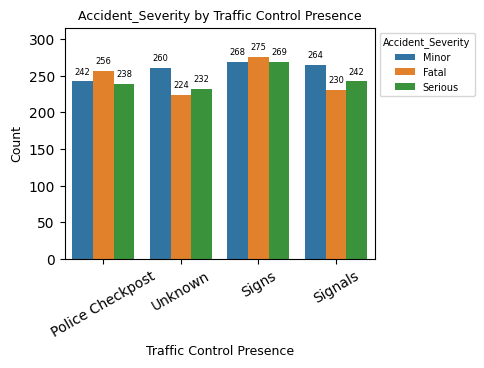

In [ ]:
plt.figure(figsize=(4, 3))
ax = sns.countplot(data=data, x="Traffic Control Presence", hue="Accident_Severity", palette="tab10")
plt.title("Accident_Severity by Traffic Control Presence", fontsize=9)
plt.xlabel("Traffic Control Presence", fontsize=9)
plt.ylabel("Count", fontsize=9)
plt.xticks(rotation=30)
plt.legend(title='Accident_Severity',fontsize=7, title_fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))

max_height = max([p.get_height() for p in ax.patches])
plt.ylim(0, max_height + 40)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 10,
            int(height),
            ha="center", fontsize=6)

plt.show()

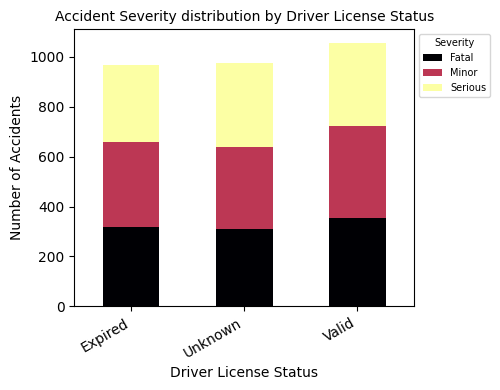

In [ ]:
# Create cross-tab of Accident_Severity vs state
cross_tab = pd.crosstab(data['Driver License Status'], data['Accident_Severity'])

# Plot stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(6,4), colormap='inferno')
plt.title('Accident Severity distribution by Driver License Status',fontsize=10)
plt.xlabel('Driver License Status')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Severity',fontsize=7, title_fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

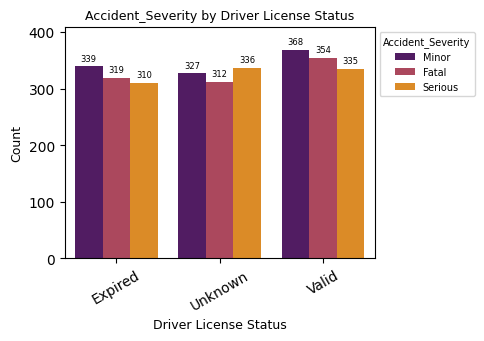

In [ ]:
plt.figure(figsize=(4, 3))
ax = sns.countplot(data=data, x="Driver License Status", hue="Accident_Severity", palette="inferno")
plt.title("Accident_Severity by Driver License Status", fontsize=9)
plt.xlabel("Driver License Status", fontsize=9)
plt.ylabel("Count", fontsize=9)
plt.xticks(rotation=30)
plt.legend(title='Accident_Severity',fontsize=7, title_fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))

max_height = max([p.get_height() for p in ax.patches])
plt.ylim(0, max_height + 40)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 10,
            int(height),
            ha="center", fontsize=6)

plt.show()

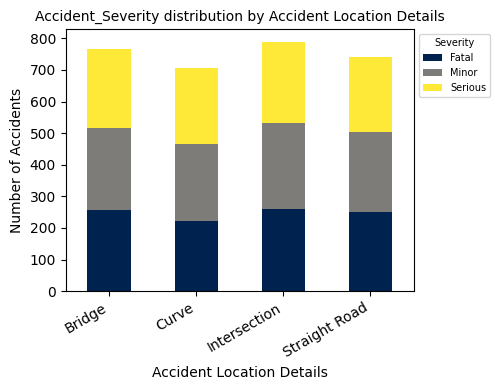

In [ ]:
# Create cross-tab of Accident_Severity vs state
cross_tab = pd.crosstab(data['Accident Location Details'], data['Accident_Severity'])

# Plot stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(6,4), colormap='cividis')
plt.title('Accident_Severity distribution by Accident Location Details',fontsize=10)
plt.xlabel('Accident Location Details')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Severity',fontsize=7, title_fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

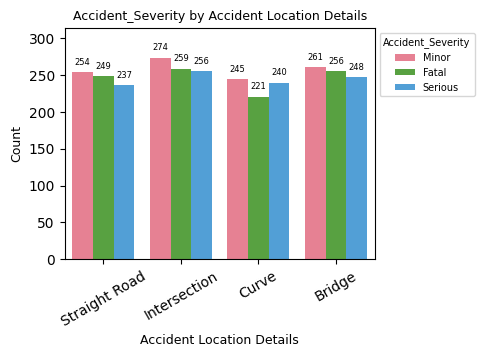

In [ ]:
plt.figure(figsize=(4, 3))
ax = sns.countplot(data=data, x="Accident Location Details", hue="Accident_Severity", palette="husl")
plt.title("Accident_Severity by Accident Location Details", fontsize=9)
plt.xlabel("Accident Location Details", fontsize=9)
plt.ylabel("Count", fontsize=9)
plt.xticks(rotation=30)
plt.legend(title='Accident_Severity',fontsize=7, title_fontsize=7, loc='upper left', bbox_to_anchor=(1, 1))

max_height = max([p.get_height() for p in ax.patches])
plt.ylim(0, max_height + 40)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 10,
            int(height),
            ha="center", fontsize=6)

plt.show()

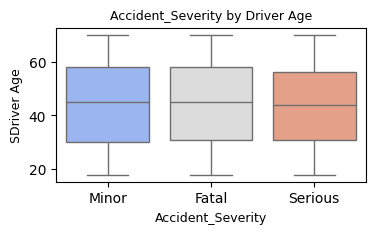

In [ ]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=data, x="Accident_Severity", y="Driver Age", palette="coolwarm")
plt.title("Accident_Severity by Driver Age", fontsize=9)
plt.xlabel("Accident_Severity", fontsize=9)
plt.ylabel("SDriver Age", fontsize=9)
plt.xticks()
plt.show()

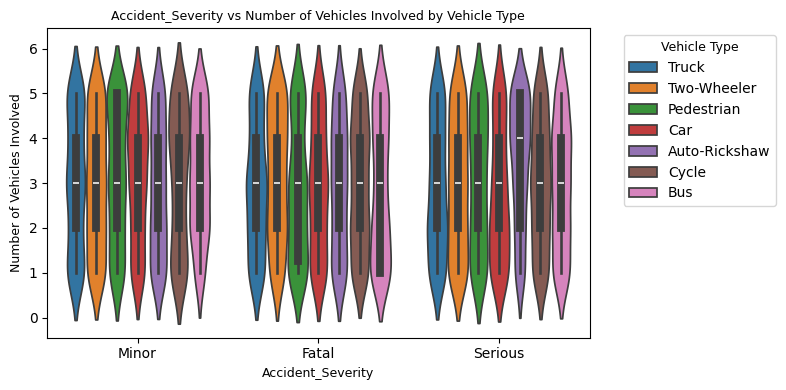

In [ ]:
data_subset = data[['Accident_Severity', 'Vehicle Type Involved', 'Number of Vehicles Involved']]

plt.figure(figsize=(8, 4))
sns.violinplot(
    data=data_subset,
    x='Accident_Severity',
    y='Number of Vehicles Involved',
    hue='Vehicle Type Involved',
)
plt.title('Accident_Severity vs Number of Vehicles Involved by Vehicle Type', fontsize=9)
plt.ylabel('Number of Vehicles Involved', fontsize=9)
plt.xlabel('Accident_Severity', fontsize=9)
plt.legend(title='Vehicle Type', title_fontsize=9, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

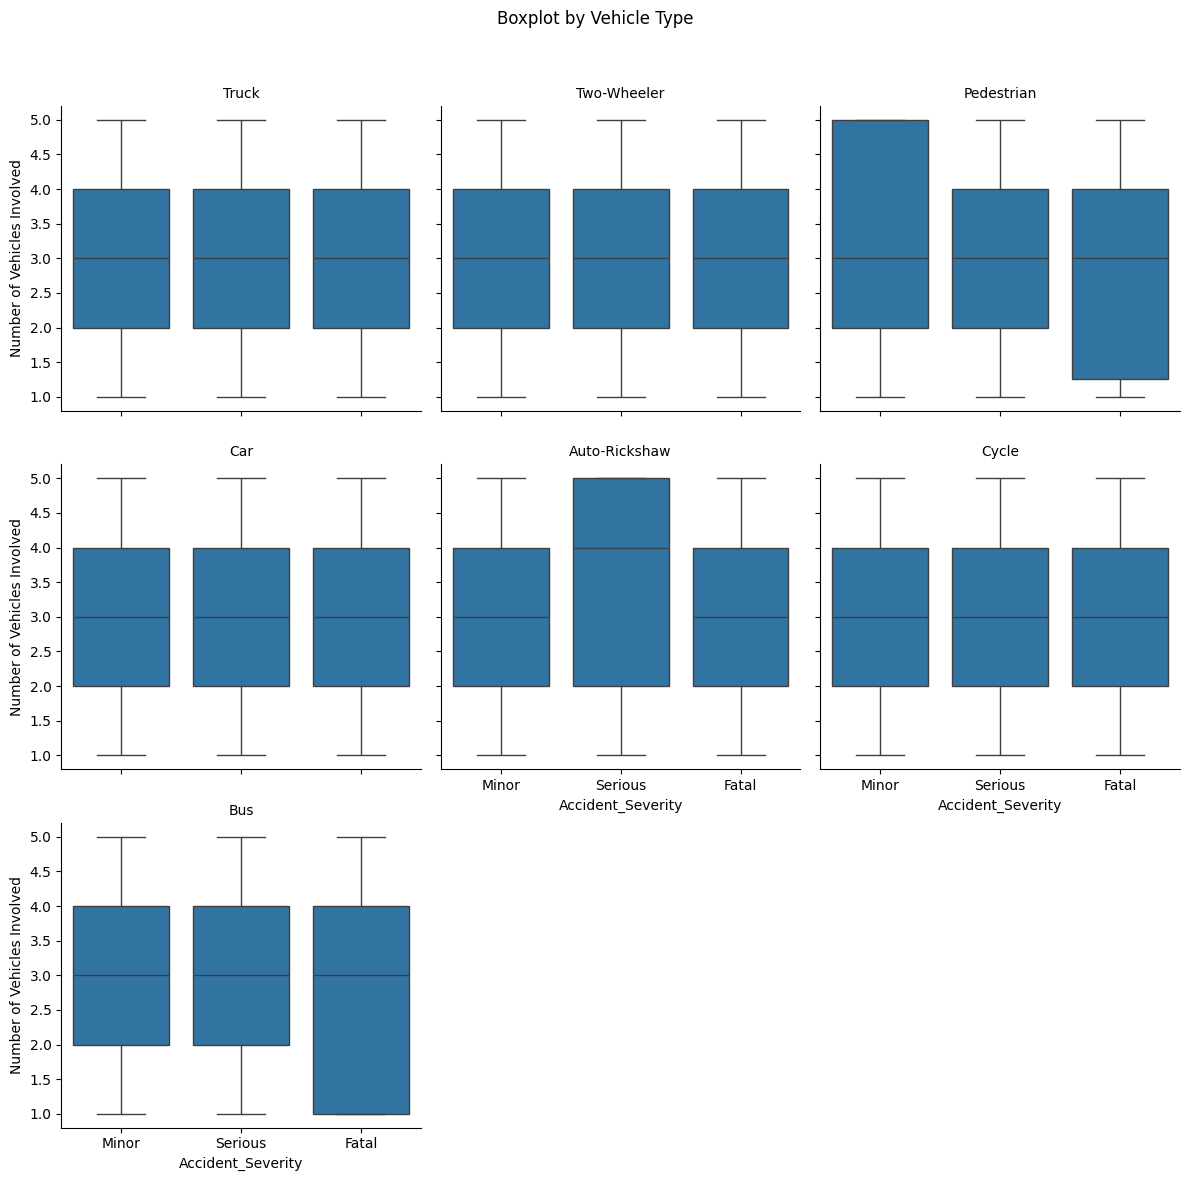

In [ ]:
import seaborn as sns
data_subset = data[['Accident_Severity', 'Vehicle Type Involved', 'Number of Vehicles Involved']]
g = sns.FacetGrid(data_subset, col='Vehicle Type Involved', height=4, col_wrap=3)
g.map(sns.boxplot, 'Accident_Severity', 'Number of Vehicles Involved', order=['Minor', 'Serious', 'Fatal'])
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Boxplot by Vehicle Type')
plt.show()

In [ ]:
import pandas as pd, numpy as np, statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
import re # Import the regular expression module

# Encode the target variable
le = LabelEncoder()
data['Severity_enc'] = le.fit_transform(data['Accident_Severity'])

features = ['Number of Vehicles Involved', 'Vehicle Type Involved',
            'Number of Casualties', 'Number of Fatalities',
            'Weather Conditions', 'Road Type', 'Road Condition',
            'Lighting Conditions', 'Traffic Control Presence',
            'Speed Limit (km/h)', 'Driver Age', 'Driver Gender',
            'Driver License Status', 'Alcohol Involvement',
            'Accident Location Details']

X = data[features].copy()

# Convert numerical features to numeric, coercing errors
numerical_cols = ['Number of Vehicles Involved', 'Number of Casualties',
                  'Number of Fatalities', 'Speed Limit (km/h)', 'Driver Age']

def extract_numeric_from_string(value):
    """Extracts the first numeric value from a string representation of a list or a single value."""
    if isinstance(value, (int, float)):
        return value
    if isinstance(value, str):
        # Remove brackets and quotes, then find all numeric values
        numeric_strings = re.findall(r'[-+]?\d*\.?\d+', value.strip("[]'\""))
        if numeric_strings:
            try:
                return float(numeric_strings[0])
            except ValueError:
                return np.nan
    return np.nan # Return NaN for any other cases

for col in numerical_cols:
    # Apply the extraction function to each element in the column
    X[col] = X[col].apply(extract_numeric_from_string)


cat_cols = ['Vehicle Type Involved', 'Weather Conditions', 'Road Type',
            'Road Condition', 'Lighting Conditions', 'Traffic Control Presence',
            'Driver Gender', 'Driver License Status', 'Alcohol Involvement',
            'Accident Location Details']

# One-hot encode categorical features
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Convert boolean columns to integer (0 or 1)
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Drop rows with any NaN values created during numeric conversion or one-hot encoding
original_rows = X.shape[0]
X = X.dropna()
if X.shape[0] < original_rows:
    print(f"Dropped {original_rows - X.shape[0]} rows with NaN values after one-hot encoding.")


y = data.loc[X.index, 'Severity_enc'] # Align y with the cleaned X

# Add a constant for the intercept
X = sm.add_constant(X, has_constant='add')

# Ensure all columns in X are numeric by converting and dropping any resulting NaNs
original_rows = X.shape[0]
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()

# Print dtypes and first few rows for debugging
print("\nData types of X after final conversion:")
print(X.dtypes)
print("\nFirst 5 rows of X after final conversion:")
print(X.head())

# Identify columns with non-numeric dtypes
non_numeric_cols = X.select_dtypes(exclude=np.number).columns
if len(non_numeric_cols) > 0:
    print("\nNon-numeric columns in X:")
    print(non_numeric_cols)
else:
    print("\nAll columns in X are numeric.")


if X.shape[0] < original_rows:
    print(f"\nDropped {original_rows - X.shape[0]} rows with non-numeric values after final conversion.")


y = data.loc[X.index, 'Severity_enc'] # Re-align y after dropping rows with NaNs

# Fit the Multinomial Logistic Regression model
model = sm.MNLogit(y, X)

# Use a robust optimization method and increase max_iter
try:
    result = model.fit(method='nm', maxiter=1000, disp=False) # Try 'nm' method
    print(result.summary())
except Exception as e:
    print(f"Error fitting model with 'nm' method: {e}. Trying 'lbfgs' method.")
    try:
        result = model.fit(method='lbfgs', maxiter=1000, disp=False) # Fallback to 'lbfgs'
        print(result.summary())
    except Exception as e:
        print(f"Error fitting model with 'lbfgs' method: {e}. Trying 'powell' method.")
        try:
            result = model.fit(method='powell', maxiter=5000, disp=False) # Fallback to 'powell' with more iterations
            print(result.summary())
        except Exception as e:
            print(f"Error fitting model with 'powell' method: {e}. Could not fit the model.")


Data types of X after final conversion:
const                                      float64
Number of Vehicles Involved                  int64
Number of Casualties                         int64
Number of Fatalities                         int64
Speed Limit (km/h)                           int64
Driver Age                                   int64
Vehicle Type Involved_Bus                    int64
Vehicle Type Involved_Car                    int64
Vehicle Type Involved_Cycle                  int64
Vehicle Type Involved_Pedestrian             int64
Vehicle Type Involved_Truck                  int64
Vehicle Type Involved_Two-Wheeler            int64
Weather Conditions_Foggy                     int64
Weather Conditions_Hazy                      int64
Weather Conditions_Rainy                     int64
Weather Conditions_Stormy                    int64
Road Type_State Highway                      int64
Road Type_Urban Road                         int64
Road Type_Village Road                   

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the dataset
data = pd.read_excel('finalacc.xlsx')

# One-Way ANOVA : Number of Vehicles Involved and Accident_Severity
model = smf.ols('Q("Number of Vehicles Involved") ~ C(Q("Accident_Severity"))', data = data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("One-Way ANOVA Table :")
print(anova_table)

FileNotFoundError: [Errno 2] No such file or directory: 'finalacc.xlsx'

In [ ]:
# One-Way ANOVA : Number of Casualties and Accident_Severity
model = smf.ols('Q("Number of Casualties") ~ C(Q("Accident_Severity"))', data = data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("One-Way ANOVA Table :")
print(anova_table)

One-Way ANOVA Table :
                                 sum_sq      df         F    PR(>F)
C(Q("Accident_Severity"))      5.417608     2.0  0.262087  0.769462
Residual                   30975.514392  2997.0       NaN       NaN


In [ ]:
# One-Way ANOVA : Number of Fatalities and Accident_Severity
model = smf.ols('Q("Number of Fatalities") ~ C(Q("Accident_Severity"))', data = data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("One-Way ANOVA Table :")
print(anova_table)

One-Way ANOVA Table :
                                sum_sq      df         F    PR(>F)
C(Q("Accident_Severity"))     3.093168     2.0  0.524042  0.592176
Residual                   8844.921499  2997.0       NaN       NaN


In [ ]:
# One-Way ANOVA : Speed Limit (km/h) and Accident_Severity
model = smf.ols('Q("Speed Limit (km/h)") ~ C(Q("Accident_Severity"))', data = data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("One-Way ANOVA Table :")
print(anova_table)

One-Way ANOVA Table :
                                 sum_sq      df         F    PR(>F)
C(Q("Accident_Severity"))  8.475414e+02     2.0  0.591392  0.553621
Residual                   2.147546e+06  2997.0       NaN       NaN


In [ ]:
# One-Way ANOVA : Driver Age and Accident_Severity
model = smf.ols('Q("Driver Age") ~ C(Q("Accident_Severity"))', data = data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("One-Way ANOVA Table :")
print(anova_table)

One-Way ANOVA Table :
                                  sum_sq      df         F    PR(>F)
C(Q("Accident_Severity"))     211.596462     2.0  0.445774  0.640371
Residual                   711295.416538  2997.0       NaN       NaN


In [ ]:
from scipy.stats import chi2_contingency

# Chi-Square Test: Association between Accident_Severity and Vehicle Type Involved
contingency_table = pd.crosstab(data['Accident_Severity'], data['Vehicle Type Involved'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test between Vehicle Type Involved and Accident_Severity:")
print(f"Chi2 Statistic = {chi2:.3f}, Degrees of Freedom = {dof}, p-value = {p:.3f}")
print("\nContingency Table:")
print(contingency_table)

alpha = 0.05
if p < alpha:
    print("\nThere is a significant association between Vehicle Type Involved and Accident_Severity")
else:
    print("\nResult: There is no significant association between Vehicle Type Involved and Accident_Severity")


Chi-Square Test between Vehicle Type Involved and Accident_Severity:
Chi2 Statistic = 27.212, Degrees of Freedom = 12, p-value = 0.007

Contingency Table:
Vehicle Type Involved  Auto-Rickshaw  Bus  Car  Cycle  Pedestrian  Truck  \
Accident_Severity                                                          
Fatal                            129  167  125    167         134    132   
Minor                            165  130  138    122         162    162   
Serious                          155  145  130    132         123    155   

Vehicle Type Involved  Two-Wheeler  
Accident_Severity                   
Fatal                          131  
Minor                          155  
Serious                        141  

There is a significant association between Vehicle Type Involved and Accident_Severity


In [ ]:
# Chi-Square Test: Association between Accident_Severity and Weather Conditions
contingency_table = pd.crosstab(data['Accident_Severity'], data['Weather Conditions'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test between Weather Conditions and Accident_Severity:")
print(f"Chi2 Statistic = {chi2:.3f}, Degrees of Freedom = {dof}, p-value = {p:.3f}")
print("\nContingency Table:")
print(contingency_table)

alpha = 0.05
if p < alpha:
    print("\nThere is a significant association between Weather Conditions and Accident_Severity")
else:
    print("\nThere is no significant association between Weather Conditions and Accident_Severity")


Chi-Square Test between Weather Conditions and Accident_Severity:
Chi2 Statistic = 11.098, Degrees of Freedom = 8, p-value = 0.196

Contingency Table:
Weather Conditions  Clear  Foggy  Hazy  Rainy  Stormy
Accident_Severity                                    
Fatal                 190    195   200    197     203
Minor                 202    174   203    224     231
Serious               182    207   205    210     177

There is no significant association between Weather Conditions and Accident_Severity


In [ ]:
# Chi-Square Test: Association between Accident_Severity and Road Type
contingency_table = pd.crosstab(data['Accident_Severity'], data['Road Type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test between Road Type and Accident_Severity:")
print(f"Chi2 Statistic = {chi2:.3f}, Degrees of Freedom = {dof}, p-value = {p:.3f}")
print("\nContingency Table:")
print(contingency_table)

alpha = 0.05
if p < alpha:
    print("\nThere is a significant association between Road Type and Accident_Severity")
else:
    print("\nThere is no significant association between Road Type and Accident_Severity")


Chi-Square Test between Road Type and Accident_Severity:
Chi2 Statistic = 11.013, Degrees of Freedom = 6, p-value = 0.088

Contingency Table:
Road Type          National Highway  State Highway  Urban Road  Village Road
Accident_Severity                                                           
Fatal                           242            261         254           228
Minor                           248            252         252           282
Serious                         259            258         206           258

There is no significant association between Road Type and Accident_Severity


In [ ]:
# Chi-Square Test: Association between Accident_Severity and Road Condition
contingency_table = pd.crosstab(data['Accident_Severity'], data['Road Condition'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test between Road Condition and Accident_Severity:")
print(f"Chi2 Statistic = {chi2:.3f}, Degrees of Freedom = {dof}, p-value = {p:.3f}")
print("\nContingency Table:")
print(contingency_table)

alpha = 0.05
if p < alpha:
    print("\nThere is a significant association between Road Condition and Accident_Severity")
else:
    print("\nThere is no significant association between Road Condition and Accident_Severity")


Chi-Square Test between Road Condition and Accident_Severity:
Chi2 Statistic = 3.990, Degrees of Freedom = 6, p-value = 0.678

Contingency Table:
Road Condition     Damaged  Dry  Under Construction  Wet
Accident_Severity                                       
Fatal                  225  248                 266  246
Minor                  252  248                 274  260
Serious                234  265                 238  244

There is no significant association between Road Condition and Accident_Severity


In [ ]:
# Chi-Square Test: Association between Accident_Severity and Lighting Conditions
contingency_table = pd.crosstab(data['Accident_Severity'], data['Lighting Conditions'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test between Lighting Conditions and Accident_Severity:")
print(f"Chi2 Statistic = {chi2:.3f}, Degrees of Freedom = {dof}, p-value = {p:.3f}")
print("\nContingency Table:")
print(contingency_table)

alpha = 0.05
if p < alpha:
    print("\nThere is a significant association between Lighting Conditions and Accident_Severity")
else:
    print("\nThere is no significant association between Lighting Conditions and Accident_Severity")


Chi-Square Test between Lighting Conditions and Accident_Severity:
Chi2 Statistic = 3.484, Degrees of Freedom = 6, p-value = 0.746

Contingency Table:
Lighting Conditions  Dark  Dawn  Daylight  Dusk
Accident_Severity                              
Fatal                 254   221       262   248
Minor                 259   256       252   267
Serious               250   248       239   244

There is no significant association between Lighting Conditions and Accident_Severity


In [ ]:
# Chi-Square Test: Association between Accident_Severity and Traffic Control Presence
contingency_table = pd.crosstab(data['Accident_Severity'], data['Traffic Control Presence'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test between Traffic Control Presence and Accident_Severity:")
print(f"Chi2 Statistic = {chi2:.3f}, Degrees of Freedom = {dof}, p-value = {p:.3f}")
print("\nContingency Table:")
print(contingency_table)

alpha = 0.05
if p < alpha:
    print("\nThere is a significant association between Traffic Control Presence and Accident_Severity")
else:
    print("\nThere is no significant association between Traffic Control Presence and Accident_Severity")


Chi-Square Test between Traffic Control Presence and Accident_Severity:
Chi2 Statistic = 4.472, Degrees of Freedom = 6, p-value = 0.613

Contingency Table:
Traffic Control Presence  Police Checkpost  Signals  Signs  Unknown
Accident_Severity                                                  
Fatal                                  256      230    275      224
Minor                                  242      264    268      260
Serious                                238      242    269      232

There is no significant association between Traffic Control Presence and Accident_Severity


In [ ]:
# Chi-Square Test: Association between Accident_Severity and Driver Gender
contingency_table = pd.crosstab(data['Accident_Severity'], data['Driver Gender'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test between Driver Gender and Accident_Severity:")
print(f"Chi2 Statistic = {chi2:.3f}, Degrees of Freedom = {dof}, p-value = {p:.3f}")
print("\nContingency Table:")
print(contingency_table)

alpha = 0.05
if p < alpha:
    print("\nThere is a significant association between Driver Gender and Accident_Severity")
else:
    print("\nThere is no significant association between Driver Gender and Accident_Severity")


Chi-Square Test between Driver Gender and Accident_Severity:
Chi2 Statistic = 0.548, Degrees of Freedom = 2, p-value = 0.761

Contingency Table:
Driver Gender      Female  Male
Accident_Severity              
Fatal                 520   465
Minor                 541   493
Serious               502   479

There is no significant association between Driver Gender and Accident_Severity


In [ ]:
# Chi-Square Test: Association between Accident_Severity and Driver License Status
contingency_table = pd.crosstab(data['Accident_Severity'], data['Driver License Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test between Driver License Status and Accident_Severity:")
print(f"Chi2 Statistic = {chi2:.3f}, Degrees of Freedom = {dof}, p-value = {p:.3f}")
print("\nContingency Table:")
print(contingency_table)

alpha = 0.05
if p < alpha:
    print("\nThere is a significant association between Driver License Status and Accident_Severity")
else:
    print("\nThere is no significant association between Driver License Status and Accident_Severity")


Chi-Square Test between Driver License Status and Accident_Severity:
Chi2 Statistic = 2.105, Degrees of Freedom = 4, p-value = 0.717

Contingency Table:
Driver License Status  Expired  Unknown  Valid
Accident_Severity                             
Fatal                      319      312    354
Minor                      339      327    368
Serious                    310      336    335

There is no significant association between Driver License Status and Accident_Severity


In [ ]:
# Chi-Square Test: Association between Accident_Severity and Alcohol Involvement
contingency_table = pd.crosstab(data['Accident_Severity'], data['Alcohol Involvement'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test between Alcohol Involvement and Accident_Severity:")
print(f"Chi2 Statistic = {chi2:.3f}, Degrees of Freedom = {dof}, p-value = {p:.3f}")
print("\nContingency Table:")
print(contingency_table)

alpha = 0.05
if p < alpha:
    print("\nThere is a significant association between Alcohol Involvement and Accident_Severity")
else:
    print("\nThere is no significant association between Alcohol Involvement and Accident_Severity")


Chi-Square Test between Alcohol Involvement and Accident_Severity:
Chi2 Statistic = 0.967, Degrees of Freedom = 2, p-value = 0.617

Contingency Table:
Alcohol Involvement   No  Yes
Accident_Severity            
Fatal                484  501
Minor                522  512
Serious              474  507

There is no significant association between Alcohol Involvement and Accident_Severity


In [ ]:
# Chi-Square Test: Association between Accident_Severity and Accident Location Details
contingency_table = pd.crosstab(data['Accident_Severity'], data['Accident Location Details'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test between Accident Location Details and Accident_Severity:")
print(f"Chi2 Statistic = {chi2:.3f}, Degrees of Freedom = {dof}, p-value = {p:.3f}")
print("\nContingency Table:")
print(contingency_table)

alpha = 0.05
if p < alpha:
    print("\nThere is a significant association between Accident Location Details and Accident_Severity")
else:
    print("\nThere is no significant association between Accident Location Details and Accident_Severity")


Chi-Square Test between Accident Location Details and Accident_Severity:
Chi2 Statistic = 1.303, Degrees of Freedom = 6, p-value = 0.972

Contingency Table:
Accident Location Details  Bridge  Curve  Intersection  Straight Road
Accident_Severity                                                    
Fatal                         256    221           259            249
Minor                         261    245           274            254
Serious                       248    240           256            237

There is no significant association between Accident Location Details and Accident_Severity


In [ ]:
!pip install --upgrade prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 7.8 MB/s eta 0:00:00


Explained variance ratio: [0.73934127 0.24485383]
Cumulative explained variance: [0.73934127 0.9841951 ] 

2 components explain 98.42% of the variance
(3000, 2)


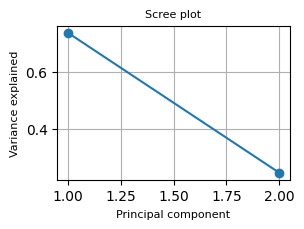

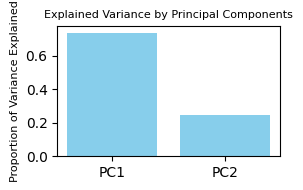

In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['Number of Vehicles Involved', 'Number of Casualties',
                      'Number of Fatalities', 'Speed Limit (km/h)', 'Driver Age']

numerical_data = data[numerical_features].copy()

from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_data[numerical_features])

# Fit PCA
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(numerical_data[numerical_features])

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
print("Explained variance ratio:", explained_var)
print("Cumulative explained variance:", cumulative_var, "\n")

for i, val in enumerate(cumulative_var) :
    if val >= 0.90 :
       print(f"{i+1} components explain {val*100:.2f}% of the variance")
       break

print(X_pca.shape)

# Scree plot
plt.figure(figsize=(3, 2))
plt.plot(np.arange(1, 3), explained_var, marker="o")
plt.xlabel("Principal component",fontsize=8)
plt.ylabel("Variance explained",fontsize=8)
plt.title("Scree plot",fontsize=8)
plt.grid(True)
plt.show()

# Visualize the explained variance
plt.figure(figsize=(3, 2))
plt.bar(['PC1', 'PC2'], pca.explained_variance_ratio_, color='skyblue')
plt.title('Explained Variance by Principal Components',fontsize=8)
plt.ylabel('Proportion of Variance Explained',fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
categorical_features = ['Weather Conditions', 'Road Type', 'Road Condition',
                        'Lighting Conditions', 'Traffic Control Presence',
                        'Driver Gender', 'Driver License Status', 'Alcohol Involvement',
                        'Accident Location Details']

categorical_data = data[categorical_features].apply(lambda col : col.astype('category'))

import prince

mca = prince.MCA(n_components=2, n_iter=3, copy=True, check_input=True, engine='sklearn', random_state=42)
mca = mca.fit(categorical_data)
mca_components = mca.transform(categorical_data)
print(mca_components.head())

          0         1
0  0.100544 -0.095541
1 -0.522400  0.560718
2 -0.034503  0.205489
3  0.083701  0.657165
4  0.120985 -0.798129


13 components explain 82.32% of the variance
Explained variance ratio: [7.72505315e-02 7.49953814e-02 7.35690041e-02 6.54020578e-02
 6.34545163e-02 6.21633441e-02 6.11060546e-02 6.03917044e-02
 5.85414503e-02 5.79099356e-02 5.74668627e-02 5.58024340e-02
 5.51340122e-02 4.40469895e-02 1.83482194e-02 1.77091135e-02
 1.74929478e-02 1.67607222e-02 1.65863027e-02 1.58231801e-02
 1.52925014e-02 1.47527344e-02 7.90647560e-31]
Cumulative explained variance: [0.07725053 0.15224591 0.22581492 0.29121697 0.35467149 0.41683484
 0.47794089 0.53833259 0.59687404 0.65478398 0.71225084 0.76805328
 0.82318729 0.86723428 0.8855825  0.90329161 0.92078456 0.93754528
 0.95413158 0.96995476 0.98524727 1.         1.        ] 

Component 1: 0.0773 ( 7.73% of variance)
Component 2: 0.0750 ( 7.50% of variance)
Component 3: 0.0736 ( 7.36% of variance)
Component 4: 0.0654 ( 6.54% of variance)
Component 5: 0.0635 ( 6.35% of variance)
Component 6: 0.0622 ( 6.22% of variance)
Component 7: 0.0611 ( 6.11% of variance)

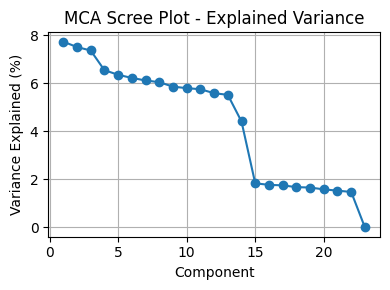

In [ ]:
categorical_features = ['Weather Conditions', 'Road Type', 'Road Condition',
                        'Lighting Conditions', 'Traffic Control Presence',
                        'Driver Gender', 'Driver License Status', 'Alcohol Involvement',
                        'Accident Location Details']

categorical_data = data[categorical_features].apply(lambda col : col.astype('category'))

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(categorical_data)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

encoded_df = encoded_df / encoded_df.sum(axis=0)
grand_total = encoded_df.values.sum()

row_masses = encoded_df.sum(axis=1) / grand_total
col_masses = encoded_df.sum(axis=0) / grand_total

correspondence_matrix = encoded_df / grand_total
expected_matrix = np.outer(row_masses, col_masses)
S = (correspondence_matrix - expected_matrix) / np.sqrt(expected_matrix)

# Apply SVD on standardized residual matrix
U, S, Vt = np.linalg.svd(S, full_matrices=False)
eigenvalues = S**2
explained_inertia = eigenvalues / eigenvalues.sum()
cumulative = np.cumsum(explained_inertia)

for i, val in enumerate(cumulative) :
    if val >= 0.80 :
       print(f"{i+1} components explain {val*100:.2f}% of the variance")
       break

print("Explained variance ratio:", explained_inertia)
print("Cumulative explained variance:", cumulative, "\n")

for i, var in enumerate(explained_inertia[:10], start=1):
    print(f"Component {i}: {var:.4f} ({var*100: .2f}% of variance)")

plt.figure(figsize=(4, 3))
plt.plot(range(1, len(explained_inertia)+1), explained_inertia * 100, marker='o')
plt.title("MCA Scree Plot - Explained Variance")
plt.xlabel("Component")
plt.ylabel("Variance Explained (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

(3000, 2)


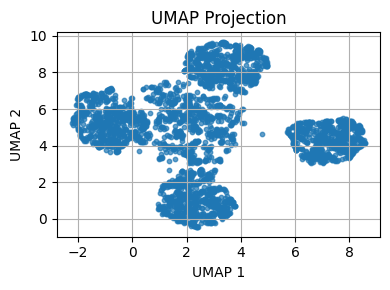

In [ ]:
k = 14
reduced_mca = U[:, :k] @ np.diag(S[:k])

from umap import UMAP

umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(reduced_mca)

print(X_umap.shape)

plt.figure(figsize=(4, 3))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=10, alpha=0.7)
plt.title("UMAP Projection")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
X_combined = np.hstack((X_pca, X_umap))
X_combined.shape

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])

X_combined_df = pd.concat([pca_df, umap_df], axis=1)

For n_clusters = 2, Silhouette Score = 0.4597
For n_clusters = 3, Silhouette Score = 0.3414
For n_clusters = 4, Silhouette Score = 0.3467
For n_clusters = 5, Silhouette Score = 0.3620
For n_clusters = 6, Silhouette Score = 0.3322


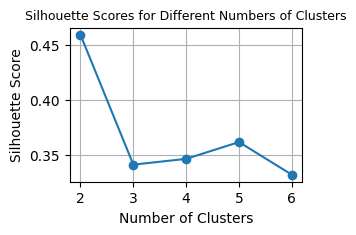


Optimal number of clusters: 2


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Range of clusters to try
range_n_clusters = list(range(2, 7))

# Store the silhouette scores
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_combined)

    # Compute the silhouette score
    score = silhouette_score(X_combined, cluster_labels)
    silhouette_scores.append(score)
    print(f"For n_clusters = {n_clusters}, Silhouette Score = {score:.4f}")

# Plotting the silhouette scores
plt.figure(figsize=(3, 2))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters",fontsize=9)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Best number of clusters
best_k = range_n_clusters[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {best_k}")

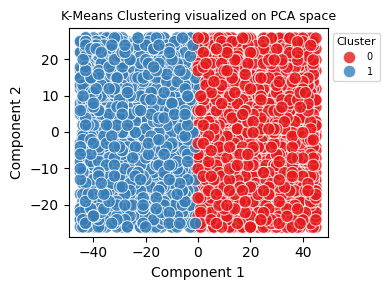

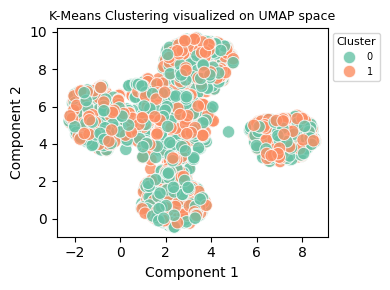

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_combined)

X_combined_df['Cluster'] = cluster_labels

# Visualize clusters on PCA space
plt.figure(figsize=(4, 3))
sns.scatterplot(data=X_combined_df, x= 'PC1', y= 'PC2', hue='Cluster', palette='Set1', s=80, alpha=0.8)
plt.title('K-Means Clustering visualized on PCA space',fontsize=9)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster',fontsize=7, title_fontsize=8, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Visualize clusters on UMAP space
plt.figure(figsize=(4, 3))
sns.scatterplot(data=X_combined_df, x= 'UMAP1', y= 'UMAP2', hue='Cluster', palette='Set2', s=80, alpha=0.8)
plt.title('K-Means Clustering visualized on UMAP space',fontsize=9)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster',fontsize=7, title_fontsize=8, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<Figure size 400x300 with 0 Axes>

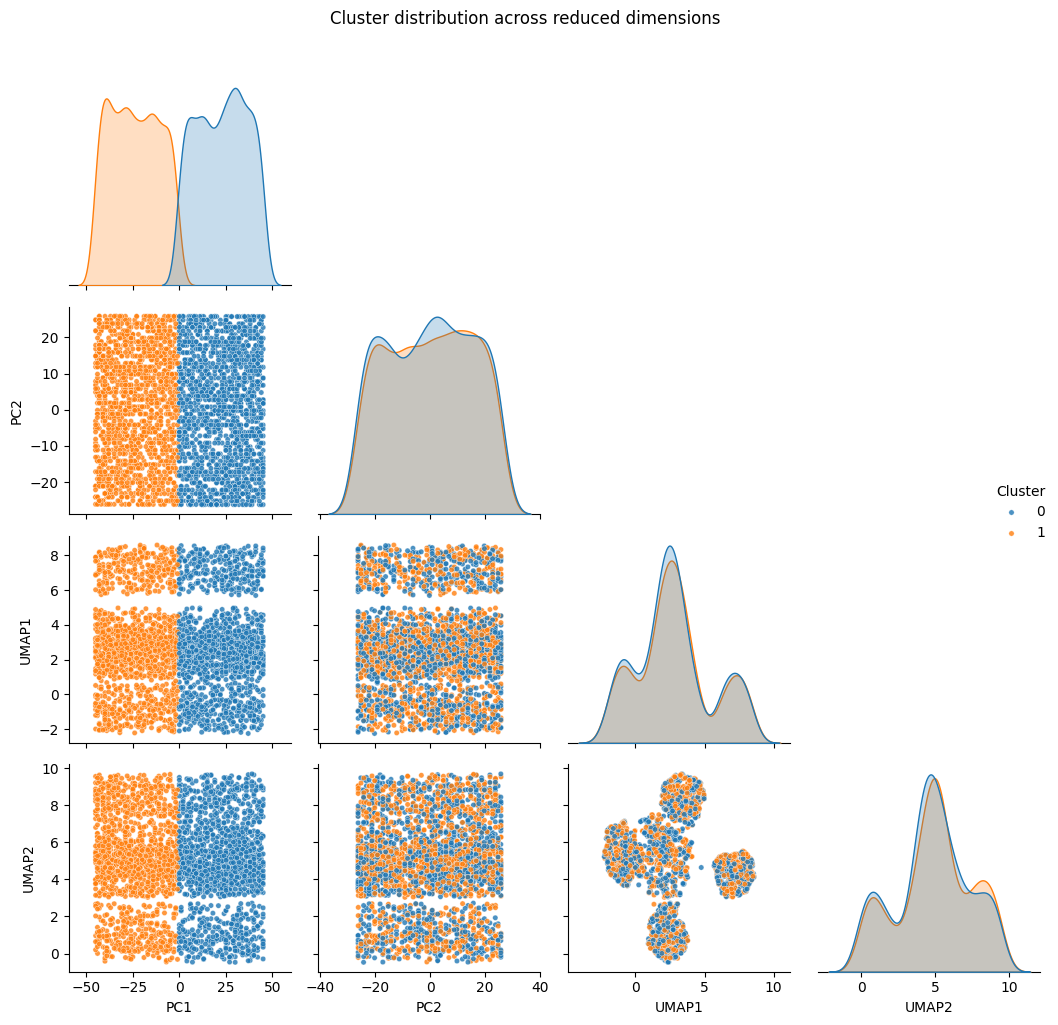

In [ ]:
# Pairplot with all 4 components
plt.figure(figsize=(4, 3))
sns.pairplot(data=X_combined_df, vars=['PC1', 'PC2', 'UMAP1', 'UMAP2'], hue='Cluster', palette='tab10', corner=True, plot_kws={'s':15, 'alpha':0.8})
plt.suptitle('Cluster distribution across reduced dimensions', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
dir(mca)

['J_',
 'K_',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_column_cosine_similarities',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_eigenvalues_summary',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prepare',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_row_cosine_similarities',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'active_cols_',
 'active_ro

In [ ]:
[attr for attr in dir(mca) if 'inertia' in attr.lower()]

['total_inertia_']

In [ ]:
!pip install --upgrade kmodes

In [ ]:
categorical_features = ['Weather Conditions', 'Road Type', 'Road Condition',
                        'Lighting Conditions', 'Traffic Control Presence',
                        'Driver Gender', 'Driver License Status', 'Alcohol Involvement',
                        'Accident Location Details']
categorical_data = data[categorical_features].reset_index(drop=True)

kproto_data = pd.concat([categorical_data, X_combined_df], axis=1)

for col in categorical_features :
   kproto_data[col] = kproto_data[col].astype('object')

categorical_indices = [kproto_data.columns.get_loc(col) for col in categorical_features]

from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=2, init='Cao', n_init=5, verbose=2, random_state=42)
clusters = kproto.fit_predict(kproto_data, categorical=categorical_indices)

kproto_data['Cluster'] = clusters

print("\nCluster assignments:")
print(kproto_data['Cluster'].value_counts())

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 292, ncost: 1372341.2044156226
Run: 1, iteration: 2/100, moves: 111, ncost: 1363775.0150777905
Run: 1, iteration: 3/100, moves: 28, ncost: 1363253.5610574067
Run: 1, iteration: 4/100, moves: 17, ncost: 1363027.278304029
Run: 1, iteration: 5/100, moves: 24, ncost: 1362455.0223372418
Run: 1, iteration: 6/100, moves: 6, ncost: 1362407.07330293
Run: 1, iteration: 7/100, moves: 0, ncost: 1362407.07330293
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 907, ncost: 1451713.7084744293
Run: 2, iteration: 2/100, moves: 360, ncost: 1364774.533642138
Run: 2, iteration: 3/100, moves: 47, ncost: 1363272.6955652204
Run: 2, iteration: 4/100, moves: 5, ncost: 1363241.0646460787
Run: 2, iteration: 5/100, moves: 15, ncost: 1363027.278304029
Run: 2, iterat

In [ ]:
plt.figure(figsize=(4, 3))
sns.scatterplot(data=kproto_data, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=30, alpha=0.8)
plt.title("K-Prototypes Clustering visualized with PCA", fontsize=10)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title='Cluster',fontsize=7, title_fontsize=8, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

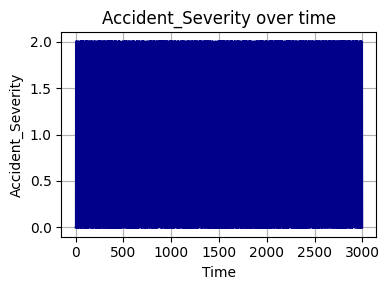

In [ ]:
severity_map = {'Minor': 0, 'Serious': 1, 'Fatal': 2}
data['Severity_Encoded'] = data['Accident_Severity'].map(severity_map)

plt.figure(figsize=(4,3))
plt.plot(data['Severity_Encoded'], color='darkblue')
plt.title("Accident_Severity over time")
plt.xlabel("Time")
plt.ylabel("Accident_Severity")
plt.grid(True)
plt.tight_layout()
plt.show()

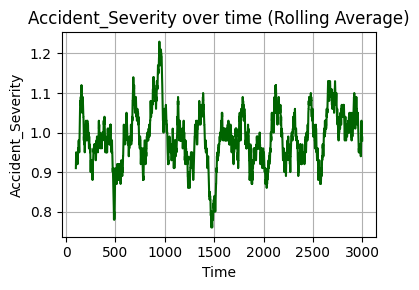

In [ ]:
rolling_avg = data['Severity_Encoded'].rolling(window=100).mean()

plt.figure(figsize=(4, 3))
plt.plot(rolling_avg, color='darkgreen')
plt.title("Accident_Severity over time (Rolling Average)")
plt.xlabel("Time")
plt.ylabel("Accident_Severity")
plt.grid(True)
plt.tight_layout()
plt.show()

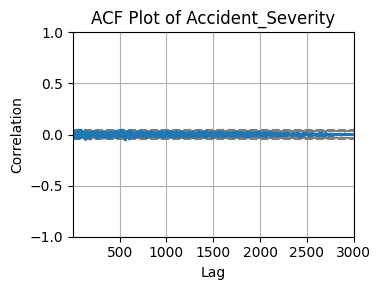

In [ ]:
# ACF Plot

from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(4, 3))  # Set the figure size here
autocorrelation_plot(data['Severity_Encoded'])
plt.title("ACF Plot of Accident_Severity")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

Classification Report (Random forest) :
              precision    recall  f1-score   support

           0       0.35      0.38      0.37       310
           1       0.37      0.38      0.38       296
           2       0.34      0.29      0.32       294

    accuracy                           0.35       900
   macro avg       0.35      0.35      0.35       900
weighted avg       0.35      0.35      0.35       900


Confusion Matrix:
[[119 100  91]
 [108 113  75]
 [115  93  86]]


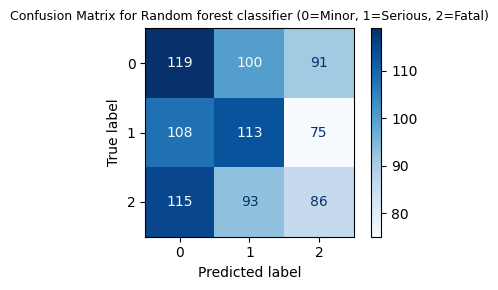

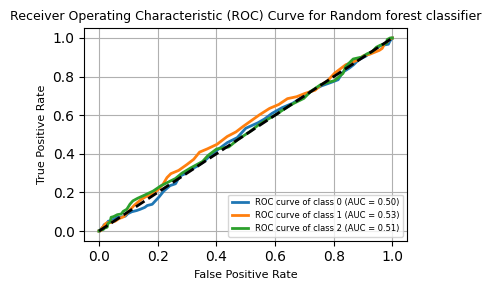

In [ ]:
# Classification

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


# i) Random forest

severity_map = {'Minor': 0, 'Serious': 1, 'Fatal': 2}
data['Severity_Encoded'] = data['Accident_Severity'].map(severity_map)

y = data['Severity_Encoded']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_features = ['Weather Conditions', 'Road Type', 'Road Condition',
                        'Lighting Conditions', 'Traffic Control Presence',
                        'Driver Gender', 'Driver License Status', 'Alcohol Involvement',
                        'Accident Location Details']
numerical_features = ['Number of Vehicles Involved', 'Number of Casualties',
                      'Number of Fatalities', 'Speed Limit (km/h)', 'Driver Age']

#preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features), ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

X_train, X_test, y_train, y_test = train_test_split(X_combined_df, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print("Classification Report (Random forest) :")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4, 3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
disp.plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix for Random forest classifier (0=Minor, 1=Serious, 2=Fatal)', fontsize=9)
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_score = model_rf.predict_proba(X_test)

plt.figure(figsize=(4, 3))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate', fontsize=8)
plt.ylabel('True Positive Rate', fontsize=8)
plt.title('Receiver Operating Characteristic (ROC) Curve for Random forest classifier', fontsize=9)
plt.legend(loc="lower right", fontsize=6)
plt.grid(True)
plt.tight_layout()
plt.show()

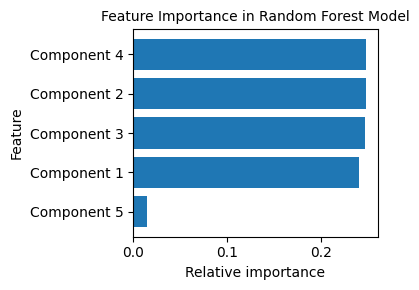

In [ ]:
feature_names = [f'Component {i+1}' for i in range(X_combined_df.shape[1])]
importances = model_rf.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(4, 3))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Relative importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model', fontsize=10)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Classification Report (Logistic regression):
              precision    recall  f1-score   support

           0       0.37      0.62      0.46       310
           1       0.35      0.30      0.32       296
           2       0.35      0.15      0.21       294

    accuracy                           0.36       900
   macro avg       0.36      0.35      0.33       900
weighted avg       0.36      0.36      0.33       900


Confusion Matrix:
[[191  79  40]
 [167  89  40]
 [165  86  43]]


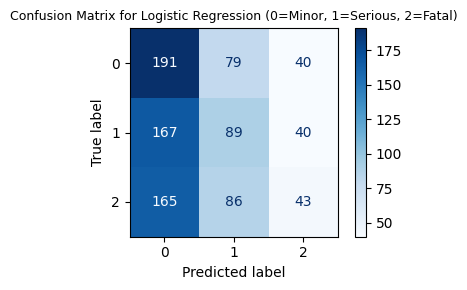

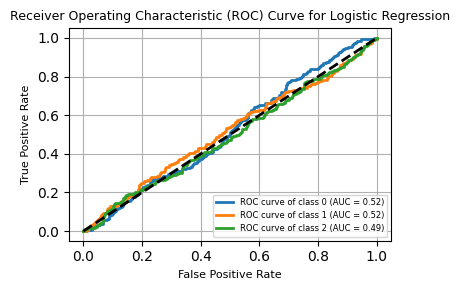

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

severity_map = {'Minor': 0, 'Serious': 1, 'Fatal': 2}
data['Severity_Encoded'] = data['Accident_Severity'].map(severity_map)

y = data['Severity_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X_combined_df, y, test_size=0.3, random_state=42)

model_log = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
model_log.fit(X_train, y_train)
y_pred = model_log.predict(X_test)

print("Classification Report (Logistic regression):")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_log.classes_)
disp.plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix for Logistic Regression (0=Minor, 1=Serious, 2=Fatal)', fontsize=9)
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_score = model_log.predict_proba(X_test)

plt.figure(figsize=(4, 3))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate', fontsize=8)
plt.ylabel('True Positive Rate', fontsize=8)
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression', fontsize=9)
plt.legend(loc="lower right", fontsize=6)
plt.grid(True)
plt.tight_layout()
plt.show()

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.34      0.35      0.35       310
           1       0.34      0.34      0.34       296
           2       0.37      0.35      0.36       294

    accuracy                           0.35       900
   macro avg       0.35      0.35      0.35       900
weighted avg       0.35      0.35      0.35       900


Confusion Matrix:
[[109 110  91]
 [109 102  85]
 [ 99  91 104]]


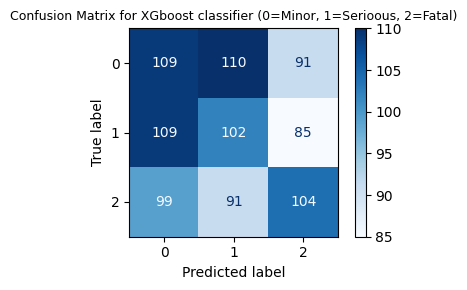

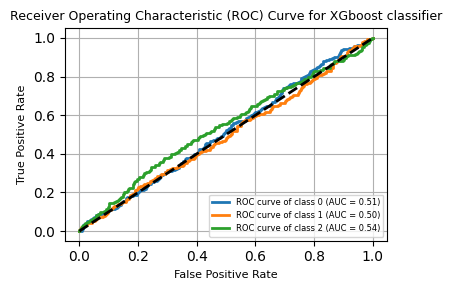

In [ ]:
# XG Boost
import xgboost as xgb

y = data['Severity_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X_combined_df, y, test_size=0.3, random_state=42)

model_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', use_label_encoder='False', random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(4, 3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb.classes_)
disp.plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix for XGboost classifier (0=Minor, 1=Serioous, 2=Fatal)', fontsize=9)
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_score = model_xgb.predict_proba(X_test)

plt.figure(figsize=(4, 3))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate', fontsize=8)
plt.ylabel('True Positive Rate', fontsize=8)
plt.title('Receiver Operating Characteristic (ROC) Curve for XGboost classifier', fontsize=9)
plt.legend(loc="lower right", fontsize=6)
plt.grid(True)
plt.tight_layout()
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.56      0.44       310
           1       0.33      0.35      0.34       296
           2       0.32      0.12      0.17       294

    accuracy                           0.35       900
   macro avg       0.34      0.34      0.32       900
weighted avg       0.34      0.35      0.32       900


Confusion Matrix:
[[173 105  32]
 [153 104  39]
 [154 106  34]]


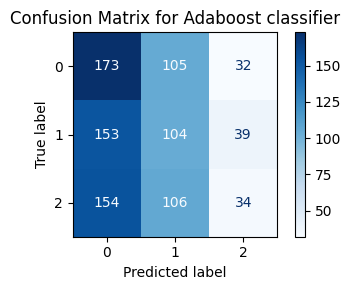

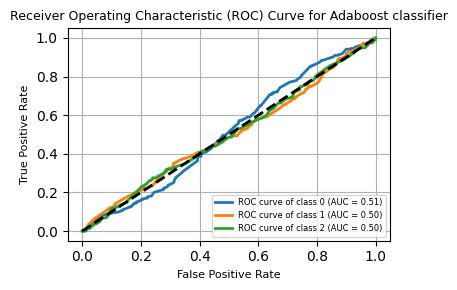

In [ ]:
# Ada Boost

from sklearn.ensemble import AdaBoostClassifier

y = data['Severity_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X_combined_df, y, test_size=0.3, random_state=42)

model_ada = AdaBoostClassifier(n_estimators=100, random_state=42)
model_ada.fit(X_train, y_train)
y_pred_ada = model_ada.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_ada))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada))

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(4, 3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_ada.classes_)
disp.plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix for Adaboost classifier')
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot ROC curve

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_score = model_ada.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(4, 3))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate', fontsize=8)
plt.ylabel('True Positive Rate', fontsize=8)
plt.title('Receiver Operating Characteristic (ROC) Curve for Adaboost classifier', fontsize=9)
plt.legend(loc="lower right", fontsize=6)
plt.grid(True)
plt.tight_layout()
plt.show()

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.36      0.49      0.41       310
           1       0.36      0.22      0.27       296
           2       0.32      0.32      0.32       294

    accuracy                           0.34       900
   macro avg       0.34      0.34      0.33       900
weighted avg       0.34      0.34      0.33       900


Confusion Matrix:
[[152  54 104]
 [134  64  98]
 [142  59  93]]


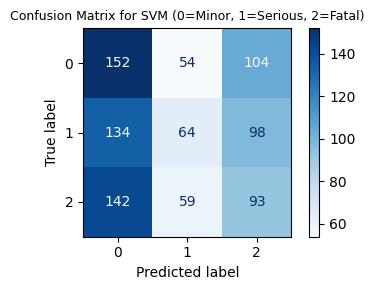

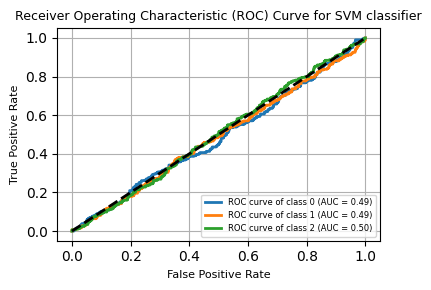

In [ ]:
# SVM

from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y = data['Severity_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X_combined_df, y, test_size=0.3, random_state=42)

model_svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(4, 3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_svm.classes_)
disp.plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix for SVM (0=Minor, 1=Serious, 2=Fatal)', fontsize=9)
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot ROC curve

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_score = model_svm.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(4, 3))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate', fontsize=8)
plt.ylabel('True Positive Rate', fontsize=8)
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM classifier', fontsize=9)
plt.legend(loc="lower right", fontsize=6)
plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3574 - loss: 3.0116 - val_accuracy: 0.3929 - val_loss: 1.1543
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3535 - loss: 1.7465 - val_accuracy: 0.3595 - val_loss: 1.1188
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3424 - loss: 1.4623 - val_accuracy: 0.3619 - val_loss: 1.1153
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3638 - loss: 1.2155 - val_accuracy: 0.3238 - val_loss: 1.1111
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3294 - loss: 1.2305 - val_accuracy: 0.3167 - val_loss: 1.1052
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3483 - loss: 1.1615 - val_accuracy: 0.3286 - val_loss: 1.1047
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3170 - loss: 1.1687 - val_accuracy: 0.3167 - val_loss: 1.1018
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3302 - loss: 1.1415 - val_accuracy: 0.3167 - val_loss

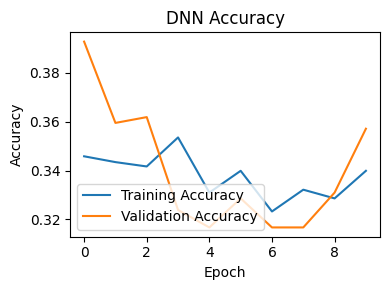

In [ ]:
# Deep Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

y = data['Severity_Encoded']
y_cat = to_categorical(y, num_classes=3)

X_train, X_test, y_train, y_test = train_test_split(X_combined_df, y_cat, test_size=0.3, random_state=42)

model_dnn = Sequential([Dense(64, input_shape=(X_combined_df.shape[1],), activation='relu'), Dropout(0.3), Dense(32, activation='relu'), Dropout(0.2), Dense(3, activation='softmax')])
model_dnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_dnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

y_pred_dnn = model_dnn.predict(X_test)

loss, accuracy = model_dnn.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

plt.figure(figsize=(4, 3))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('DNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [ ]:
!pip install --upgrade pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
# Tabnet Classifier
from pytorch_tabnet.tab_model import TabNetClassifier

y = data['Severity_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X_combined_df, y, test_size=0.3, random_state=42)

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

model_tabnet = TabNetClassifier(verbose=0)
model_tabnet.fit(X_train.values, y_train.values, eval_set=[(X_test.values, y_test.values)], patience=10, max_epochs=100)

y_pred_tabnet = model_tabnet.predict(X_test.values)

print("Classification Report:")
print(classification_report(y_test, y_pred_tabnet))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tabnet))


Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_accuracy = 0.34778
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.25      0.30       310
           1       0.34      0.20      0.25       296
           2       0.34      0.60      0.44       294

    accuracy                           0.35       900
   macro avg       0.35      0.35      0.33       900
weighted avg       0.35      0.35      0.33       900


Confusion Matrix:
[[ 78  60 172]
 [ 73  59 164]
 [ 62  56 176]]


In [ ]:
# Load your dataset
df = pd.read_excel("finalacc.xlsx")

# month name → integer
m2i = {m:i for i,m in enumerate(
       ['January','February','March','April','May','June',
        'July','August','September','October','November','December'],1)}
df['month_num'] = df['Month'].map(m2i)

# pick an arbitrary "first" weekday that matches each record’s Day of Week
w2i = {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,
       'Friday':4,'Saturday':5,'Sunday':6}
df['wday'] = df['Day of Week'].map(w2i)

anchor = pd.to_datetime({'year':df.Year,'month':df.month_num,'day':1})
df['day'] = 1 + (df.wday - anchor.dt.weekday) % 7

# Convert 'Time _of _Day' to seconds, handling both float and HH:MM formats
def time_to_seconds(time_value):
    try:
        time_str = str(time_value)
        if ':' in time_str:
            hours, minutes = map(int, time_str.split(':'))
            return hours * 3600 + minutes * 60
        else:
            return float(time_str) * 3600
    except ValueError:
        return np.nan # Handle cases where time string is not in expected format

df['Time_in_seconds'] = df['Time _of _Day'].apply(time_to_seconds)

df['timestamp'] = pd.to_datetime({'year':df.Year,
                                  'month':df.month_num,
                                  'day':df.day}) + \
                  pd.to_timedelta(df['Time_in_seconds'],unit='s')
ts = df.set_index('timestamp').sort_index()
# daily accident count
y = ts.resample('D').size().rename('accidents')
print('Y',y)

# optional exogenous regressor: daily share of bad weather
bad = ts['Weather Conditions'].isin(['Stormy','Rainy','Foggy'])
exog = bad.resample('D').mean().rename('bad_weather').to_frame()
print('exog', exog)

train_end = '2022-12-31'
y_train, y_test   = y[:train_end],          y['2023':]
X_train, X_test   = exog[:train_end],       exog['2023':]

print('y_train',y_train)
print('X_train',X_train)
print('y_test',y_test)
print(X_test)
from statsmodels.tsa.stattools import adfuller
print(adfuller(y_train)[1])          # p-value ≈ 0 .19 ⇒ non-stationary
dy_train = y_train.diff().dropna()   # first difference
print(adfuller(dy_train)[1])         # p-value < 0.05 ⇒ stationary





import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(figsize=(5,3))
plt.plot(y_train);
plt.title('Y-train');

FileNotFoundError: [Errno 2] No such file or directory: 'finalacc.xlsx'

In [ ]:
# Load the dataset
data = pd.read_excel('combined_by_state_year_month.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'combined_by_state_year_month.xlsx'

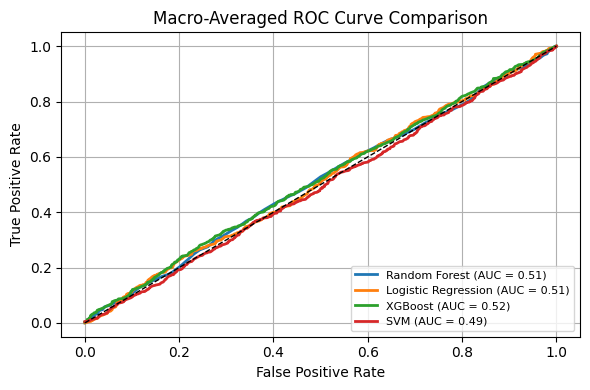

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Re-binarize true labels for multiclass
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Collect predicted probabilities from selected models
probas = {
    'Random Forest': model_rf.predict_proba(X_test),
    'Logistic Regression': model_log.predict_proba(X_test),
    'XGBoost': model_xgb.predict_proba(X_test),
    'SVM': model_svm.predict_proba(X_test)
}

# Plotting setup
plt.figure(figsize=(6, 4))

for name, y_score in probas.items():
    # Store FPR, TPR, and AUC for each class
    fpr_dict = dict()
    tpr_dict = dict()
    roc_auc_dict = dict()

    for i in range(n_classes):
        fpr_dict[i], tpr_dict[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc_dict[i] = auc(fpr_dict[i], tpr_dict[i])

    # Interpolate all ROC curves to compute average
    all_fpr = np.unique(np.concatenate([fpr_dict[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr_dict[i], tpr_dict[i])

    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)

    # Plot macro-average ROC
    plt.plot(all_fpr, mean_tpr, lw=2, label=f'{name} (AUC = {macro_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-Averaged ROC Curve Comparison')
plt.legend(loc='lower right', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


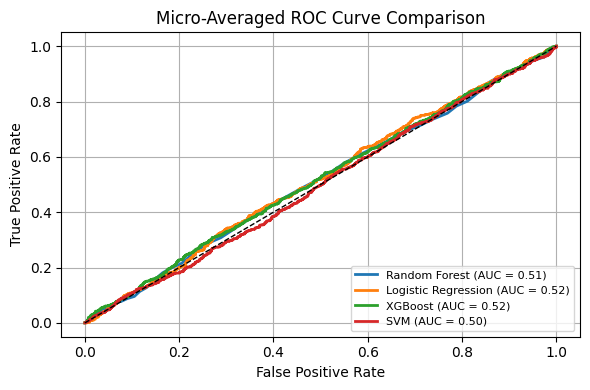

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Re-binarize true labels for multiclass
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Collect predicted probabilities from selected models
probas = {
    'Random Forest': model_rf.predict_proba(X_test),
    'Logistic Regression': model_log.predict_proba(X_test),
    'XGBoost': model_xgb.predict_proba(X_test),
    'SVM': model_svm.predict_proba(X_test)
}

# Plotting setup
plt.figure(figsize=(6, 4))

for name, y_score in probas.items():
    # Micro-average ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Averaged ROC Curve Comparison')
plt.legend(loc='lower right', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()
